In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [17]:
d = pd.read_csv('songz.csv')

In [18]:
d = d.dropna()

In [19]:
## we have mapped 0 to relaxed, 1 to angry, 2 to happy, and 3 to sad

In [20]:
def standardize(train, test):

    mean_train = np.mean(train, axis=0)
    std_train = np.std(train, axis=0)+0.000001
    mean_test = np.mean(test, axis=0)
    std_test = np.std(test, axis=0)+0.000001
    X_train = (train - mean_train) / std_train
    X_test = (test - mean_test) /std_test
    return X_train, X_test

In [21]:
from sklearn.utils import shuffle
X = d.loc[:, ['title','artist','val','dB','bpm', 'nrgy', 'dnce']]
y = d[['mood']]


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X.loc[:,'title'] = le.fit_transform(X.loc[:,'title'])

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le2 = LabelEncoder()
X.loc[:,'artist'] = le2.fit_transform(X.loc[:,'artist'])

In [24]:
#X['title'] =([int(a) for a in ['title']])

In [25]:
X = np.array(X)
X, y = shuffle(X, y)

In [26]:
X_test = X[1200:]
y_test = y[1200:]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)
# X_test,_ = standardize(X_test, [0])
# y_test, _ = standardize(y_test, [0])
from keras.utils import np_utils
from keras.utils import normalize
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
y_test = np_utils.to_categorical(encoded_Y)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/lab

In [27]:
X_train = X[0:900]
Y_train = y[0:900]
X_val = X[900:1200]
Y_val = y[900:1200]

In [28]:
# X_train, X_val = standardize(X_train, X_val)
# Y_train, Y_val = standardize(Y_train,Y_val)
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
Y_train= scaler.fit_transform(Y_train)
Y_val = scaler.fit_transform(Y_val)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
from keras.utils import np_utils
from keras.utils import normalize
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)

Y_train =  np_utils.to_categorical(encoded_Y)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [30]:
from keras.utils import np_utils
from keras.utils import normalize
encoder = LabelEncoder()
encoder.fit(Y_val)
encoded_Y = encoder.transform(Y_val)
Y_val = np_utils.to_categorical(encoded_Y)

In [46]:
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import BatchNormalization
from keras import regularizers
from keras.optimizers import Adam, SGD

model = Sequential()

# model.add(Dense(64, input_shape=(7,), activation='relu'))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.001))
# model.add(Dropout(0.4))
model.add(Dense(48, activation='relu', input_shape=(7,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(24))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(12))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(6))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# model.add(Dense(64, activation='relu'))
# #model.add(BatchNormalization())
# model.add(Dropout(0.2))


model.add(Dense(4, activation='sigmoid', name='output'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 48)                384       
_________________________________________________________________
batch_normalization_13 (Batc (None, 48)                192       
_________________________________________________________________
dropout_13 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                1176      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24)                96        
_________________________________________________________________
dropout_14 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 12)                300       
__________

In [47]:
# Adam optimizer with learning rate of 0.001
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
optimizer = Adam(lr=0.001)
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-10, decay=0)
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer = 'adam' , loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
hist = model.fit(X_train, Y_train, verbose=2, batch_size=128, epochs=50, validation_data=(X_val,Y_val),callbacks=[es, mc])

Train on 900 samples, validate on 300 samples
Epoch 1/50
Train on 900 samples, validate on 300 samples
Epoch 1/50
 - 2s - loss: 0.9042 - acc: 0.4792 - val_loss: 0.7680 - val_acc: 0.4942
 - 2s - loss: 0.9042 - acc: 0.4792 - val_loss: 0.7680 - val_acc: 0.4942

Epoch 00001: val_acc improved from -inf to 0.49417, saving model to best_model.h5

Epoch 00001: val_acc improved from -inf to 0.49417, saving model to best_model.h5
Epoch 2/50
 - 0s - loss: 0.8506 - acc: 0.5022 - val_loss: 0.7400 - val_acc: 0.5058
Epoch 2/50
 - 0s - loss: 0.8506 - acc: 0.5022 - val_loss: 0.7400 - val_acc: 0.5058

Epoch 00002: val_acc improved from 0.49417 to 0.50583, saving model to best_model.h5
Epoch 3/50

Epoch 00002: val_acc improved from 0.49417 to 0.50583, saving model to best_model.h5
Epoch 3/50
 - 0s - loss: 0.8195 - acc: 0.5144 - val_loss: 0.7273 - val_acc: 0.5217
 - 0s - loss: 0.8195 - acc: 0.5144 - val_loss: 0.7273 - val_acc: 0.5217

Epoch 00003: val_acc improved from 0.50583 to 0.52167, saving model to 

Epoch 25/50
 - 0s - loss: 0.6572 - acc: 0.6206 - val_loss: 0.6292 - val_acc: 0.6833

Epoch 00025: val_acc improved from 0.68333 to 0.68333, saving model to best_model.h5

Epoch 00025: val_acc improved from 0.68333 to 0.68333, saving model to best_model.h5
Epoch 26/50
 - 0s - loss: 0.6546 - acc: 0.6275 - val_loss: 0.6257 - val_acc: 0.6917
Epoch 26/50
 - 0s - loss: 0.6546 - acc: 0.6275 - val_loss: 0.6257 - val_acc: 0.6917

Epoch 00026: val_acc improved from 0.68333 to 0.69167, saving model to best_model.h5

Epoch 00026: val_acc improved from 0.68333 to 0.69167, saving model to best_model.h5
Epoch 27/50
 - 0s - loss: 0.6566 - acc: 0.6239 - val_loss: 0.6234 - val_acc: 0.6950
Epoch 27/50
 - 0s - loss: 0.6566 - acc: 0.6239 - val_loss: 0.6234 - val_acc: 0.6950

Epoch 00027: val_acc improved from 0.69167 to 0.69500, saving model to best_model.h5

Epoch 00027: val_acc improved from 0.69167 to 0.69500, saving model to best_model.h5
Epoch 28/50
 - 0s - loss: 0.6561 - acc: 0.6186 - val_loss: 0.624


Epoch 00050: val_acc improved from 0.75667 to 0.75833, saving model to best_model.h5

Epoch 00050: val_acc improved from 0.75667 to 0.75833, saving model to best_model.h5


In [48]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [49]:
scores

[0.5837652063527644, 0.7417218543046358]

[0.5837652063527644, 0.7417218543046358]

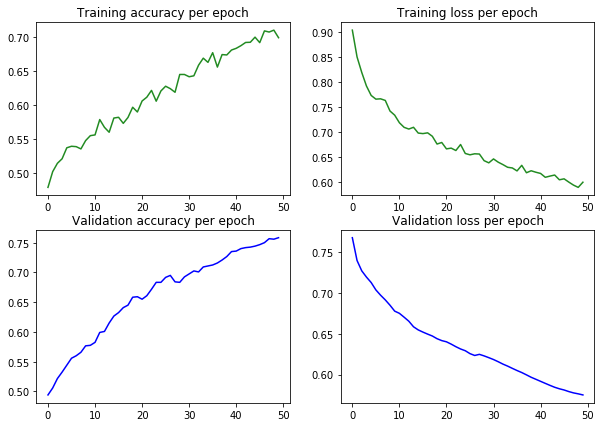

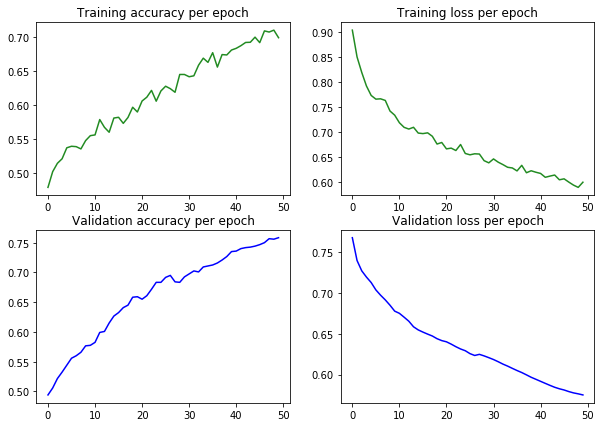

In [50]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,7))

# Training accuracy
plt.subplot(221)
plt.plot(range(0,50), hist.history['acc'], c = 'forestgreen');
plt.title('Training accuracy per epoch');

# Training loss #
plt.subplot(222)
plt.plot(range(0,50), hist.history['loss'], c = 'forestgreen');
plt.title('Training loss per epoch');

# Validation accuracy #
plt.subplot(223)
plt.plot(range(0,50), hist.history['val_acc'], c = 'blue');
plt.title('Validation accuracy per epoch');

# Validation loss #
plt.subplot(224)
plt.plot(range(0,50), hist.history['val_loss'], c = 'blue');
plt.title('Validation loss per epoch');

In [53]:
import pickle
filename = 'song_NN.pickle'

pickle_out = open(filename, 'wb')

pickle.dump(model, pickle_out)
pickle_out.close()